In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter


In [2]:
from sqlalchemy import create_engine

# Define connection parameters
DRIVER_NAME = "ODBC Driver 17 for SQL Server"  # Use the correct driver
SERVER_NAME = "JoyalVivobook"
DATABASE_NAME = "employees_db"

# Create SQLAlchemy engine
engine = create_engine(f"mssql+pyodbc://{SERVER_NAME}/{DATABASE_NAME}?trusted_connection=yes&driver={DRIVER_NAME}")


In [3]:
# Query to get all table names
query = "SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE = 'BASE TABLE'"

# Fetch table names into Pandas DataFrame
tables_df = pd.read_sql(query, engine)

# Print the list of tables
print("Tables in the database:")
print(tables_df)

Tables in the database:
     TABLE_NAME
0   departments
1      dept_emp
2  dept_manager
3     employees
4      salaries
5        titles
6    final_data


In [4]:
# Fetch data into Pandas DataFrame
departments = pd.read_sql("SELECT * FROM departments", engine)
dept_emp = pd.read_sql("SELECT * FROM dept_emp", engine)
dept_manager = pd.read_sql("SELECT * FROM dept_manager", engine)
employees = pd.read_sql("SELECT * FROM employees", engine)
salaries = pd.read_sql("SELECT * FROM salaries", engine)
titles = pd.read_sql("SELECT * FROM titles", engine)

# Close the connection
engine.dispose()

In [5]:
dept_emp.dtypes

emp_no     object
dept_no    object
dtype: object

In [6]:
dept_emp['emp_no'].duplicated().sum()

31579

In [7]:
dept_manager.head()

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183


In [8]:
dept_manager.dtypes

dept_no    object
emp_no      int64
dtype: object

In [9]:
employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,2,A,False,None
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,1,C,False,None
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,9,A,False,None
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,2,C,False,None
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,6,B,False,None


In [10]:
employees.dtypes

emp_no                      int64
emp_title_id               object
birth_date                 object
first_name                 object
last_name                  object
sex                        object
hire_date                  object
no_of_projects              int64
Last_performance_rating    object
left                         bool
last_date                  object
dtype: object

In [11]:
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [12]:
salaries.dtypes

emp_no    object
salary     int64
dtype: object

In [13]:
titles.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [14]:
titles.dtypes

title_id    object
title       object
dtype: object

In [15]:
employees[employees['emp_no']==110022]

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date
59074,110022,m0001,1956-09-12,Margareta,Markovitch,M,1985-01-01,1,C,False,None


In [16]:
dept_manager[dept_manager['emp_no']==110022]

,dept_no,emp_no
0,d001,110022


In [17]:
#CHecking null values
employees.isnull().sum()

emp_no                          0
emp_title_id                    0
birth_date                      0
first_name                      0
last_name                       0
sex                             0
hire_date                       0
no_of_projects                  0
Last_performance_rating         0
left                            0
last_date                  270157
dtype: int64

In [18]:
employees['emp_no'].duplicated().sum()

0

In [19]:
#Joined tables
df1=pd.merge(left=employees,right=dept_emp,left_on='emp_no',right_on='emp_no',how='inner')

ValueError: You are trying to merge on int64 and object columns for key 'emp_no'. If you wish to proceed you should use pd.concat

In [20]:
dept_emp['emp_no']=dept_emp['emp_no'].astype(int)

In [21]:
dept_emp.dtypes

emp_no      int32
dept_no    object
dtype: object

In [22]:
employees.dtypes

emp_no                      int64
emp_title_id               object
birth_date                 object
first_name                 object
last_name                  object
sex                        object
hire_date                  object
no_of_projects              int64
Last_performance_rating    object
left                         bool
last_date                  object
dtype: object

In [23]:
#Joined tables
df1=pd.merge(left=employees,right=dept_emp,left_on='emp_no',right_on='emp_no',how='inner')

In [24]:
df1

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date,dept_no
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,2,A,False,None,d002
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,1,C,False,None,d004
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,9,A,False,None,d004
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,2,C,False,None,d003
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,6,B,False,None,d006
...,...,...,...,...,...,...,...,...,...,...,...,...
331598,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26,10,A,False,None,d004
331599,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24,8,B,False,None,d007
331600,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,1,B,False,None,d002
331601,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,1,B,False,None,d007


In [25]:
df2=pd.merge(left=df1,right=titles,left_on='emp_title_id',right_on='title_id',how='inner')

In [26]:
df3=pd.merge(left=df2,right=salaries,on='emp_no',how='inner')

ValueError: You are trying to merge on int64 and object columns for key 'emp_no'. If you wish to proceed you should use pd.concat

In [27]:
salaries.dtypes

emp_no    object
salary     int64
dtype: object

In [28]:
salaries['emp_no']=salaries['emp_no'].astype(int)

In [29]:
df3=pd.merge(left=df2,right=salaries,on='emp_no',how='inner')

In [30]:
final_df=pd.merge(left=df3,right=departments,on='dept_no',how='inner')

In [31]:
final_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date,dept_no,title_id,title,salary,dept_name
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,2,A,False,None,d002,s0001,Staff,40000,Finance
1,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,9,B,False,None,d002,s0001,Staff,63016,Finance
2,424270,s0001,1963-01-15,Kellyn,Yoshizawa,F,1995-05-08,8,A,False,None,d002,s0001,Staff,60678,Finance
3,37473,s0001,1952-03-06,Prasadram,Valette,M,1994-02-16,3,PIP,False,None,d002,s0001,Staff,55963,Finance
4,293744,s0001,1952-04-29,Kolar,Carrere,M,1987-06-30,2,B,False,None,d002,s0001,Staff,40000,Finance


In [32]:
final_df.dtypes

emp_no                      int64
emp_title_id               object
birth_date                 object
first_name                 object
last_name                  object
sex                        object
hire_date                  object
no_of_projects              int64
Last_performance_rating    object
left                         bool
last_date                  object
dept_no                    object
title_id                   object
title                      object
salary                      int64
dept_name                  object
dtype: object

In [33]:
final_df.shape

(331603, 16)

In [34]:
final_df['hire_date']=pd.to_datetime(final_df['hire_date'],format='%Y-%m-%d')


In [35]:
employees['hire_date']=pd.to_datetime(employees['hire_date'],format='%Y-%m-%d')


In [36]:
final_df['birth_date']=pd.to_datetime(final_df['birth_date'],format='%Y-%m-%d')


In [37]:
employees['birth_date']=pd.to_datetime(employees['birth_date'],format='%Y-%m-%d')


In [38]:
employees['last_date']=pd.to_datetime(employees['last_date'],format='%Y-%m-%d')


In [39]:
final_df['last_date']=pd.to_datetime(final_df['last_date'],format='%Y-%m-%d')


In [40]:
max_last_date = final_df['last_date'].max()
final_df['age'] = ((final_df['last_date'].fillna(max_last_date) - final_df['birth_date']).dt.days // 365)


In [41]:
max_last_date = final_df['last_date'].max()
final_df['tenure']=((final_df['last_date'].fillna(max_last_date) - final_df['hire_date']).dt.days // 365)

In [42]:
max_last_date = employees['last_date'].max()
employees['age'] = ((employees['last_date'].fillna(max_last_date) - employees['birth_date']).dt.days // 365)


In [43]:
max_last_date = employees['last_date'].max()
employees['tenure']=((employees['last_date'].fillna(max_last_date) - employees['hire_date']).dt.days // 365)

In [44]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331603 entries, 0 to 331602
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   emp_no                   331603 non-null  int64         
 1   emp_title_id             331603 non-null  object        
 2   birth_date               331603 non-null  datetime64[ns]
 3   first_name               331603 non-null  object        
 4   last_name                331603 non-null  object        
 5   sex                      331603 non-null  object        
 6   hire_date                331603 non-null  datetime64[ns]
 7   no_of_projects           331603 non-null  int64         
 8   Last_performance_rating  331603 non-null  object        
 9   left                     331603 non-null  bool          
 10  last_date                33021 non-null   datetime64[ns]
 11  dept_no                  331603 non-null  object        
 12  title_id        

In [45]:
final_df.to_csv("output.csv", index=False)


In [3]:
final_df=pd.read_csv("output.csv")

# EDA

### Monthly hiring count

In [46]:
employees['hire_month']=employees['hire_date'].dt.month

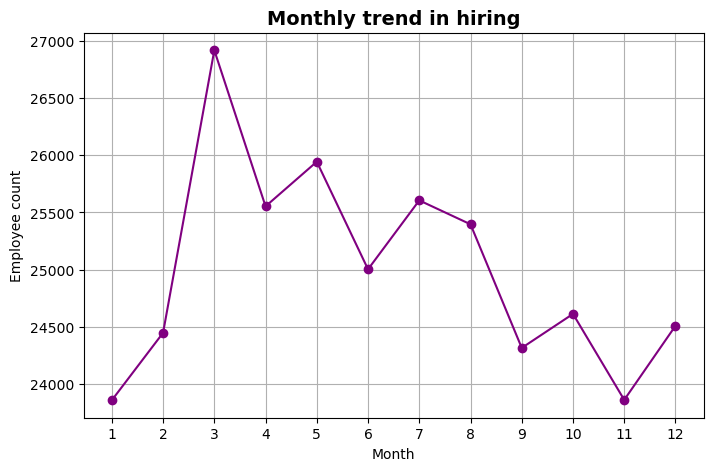

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure all months (1-12) appear in the index
all_months = np.arange(1, 13)
data = employees.groupby('hire_month')['emp_no'].count().reindex(all_months, fill_value=0)

# Plot the data
plt.figure(figsize=(8, 5))
plt.plot(data.index, data.values, color='purple', marker='o', linestyle='-')

# Set x-ticks to force all months to appear (but without custom labels)
plt.xticks(ticks=all_months)  

# Labels and formatting
plt.xlabel('Month')
plt.ylabel('Employee count')
plt.title('Monthly trend in hiring',fontweight='bold',fontsize=14)
plt.grid(True)

plt.show()


### Salary distribution boxplot

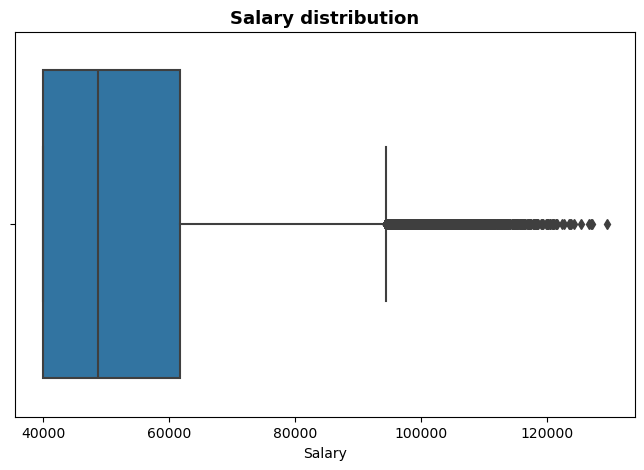

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 5))

# Create histogram
sns.boxplot(x=salaries['salary'])

plt.title('Salary distribution',fontsize=13,fontweight='bold')

plt.xlabel('Salary')
# Display the plot
plt.show()


### Salary distribution by department

c:\Users\Joyal\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


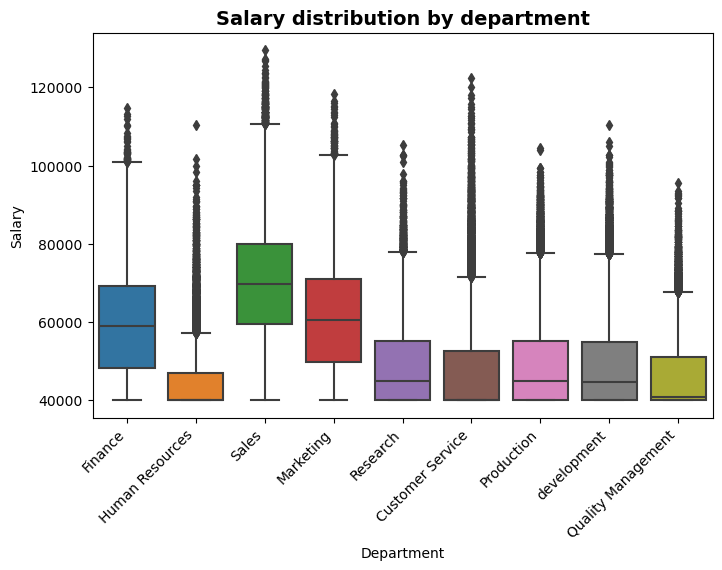

In [52]:
plt.figure(figsize=(8,5))
data=final_df.sort_values(by='salary',ascending=False)
sns.boxplot(data=data, x='dept_name', y='salary')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.title('Salary distribution by department',fontsize=14,fontweight='bold')
plt.show()

### Salary distribution by title

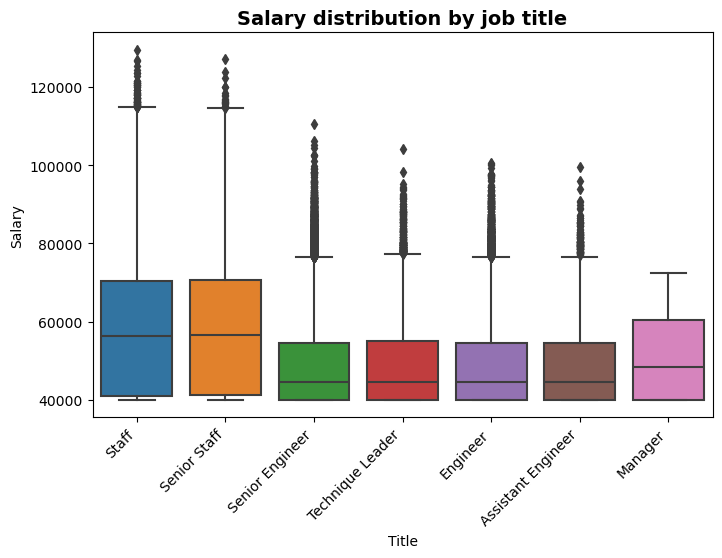

In [99]:
plt.figure(figsize=(8,5))

data = final_df.drop_duplicates(subset=['emp_no'])
data=data.sort_values(by='salary',ascending=False)
sns.boxplot(data=data, x='title', y='salary')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Title')
plt.ylabel('Salary')
plt.title('Salary distribution by job title',fontsize=14,fontweight='bold')
plt.show()

### Histogram of age of employees

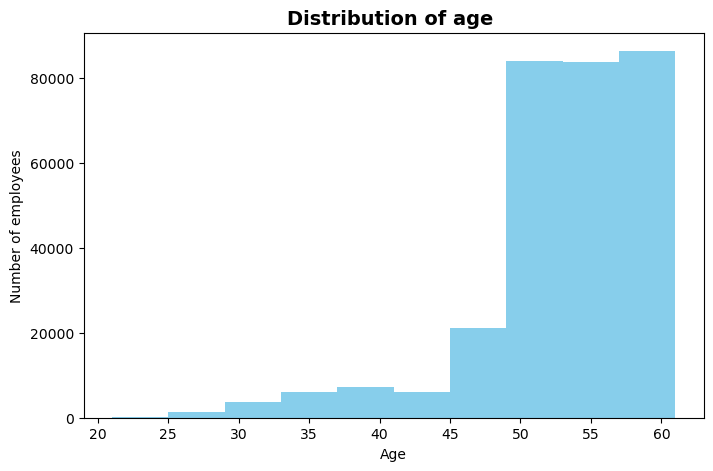

In [82]:
plt.figure(figsize=(8, 5))
plt.hist(employees['age'],color='skyblue')
plt.title('Distribution of age ',fontsize=14,fontweight='bold')
plt.ylabel('Number of employees')
plt.xlabel('Age')
plt.show()

### Pie chart showing Male female distribution

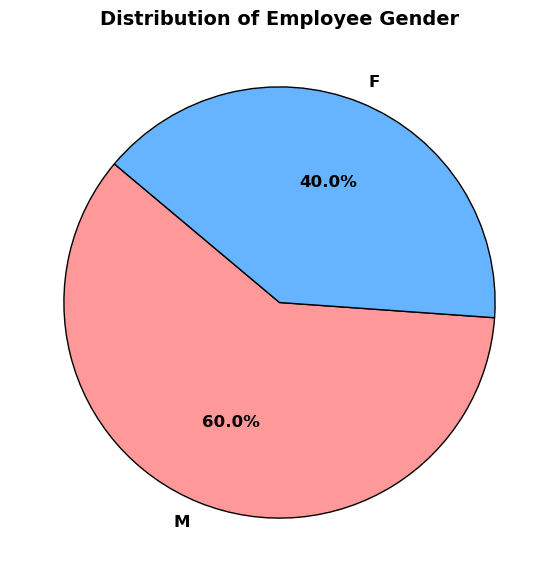

In [54]:
# Count values
grouped = employees['sex'].value_counts()

# Create pie chart with enhancements
plt.figure(figsize=(7, 7))  # Set figure size
plt.pie(grouped, 
        labels=grouped.index, 
        autopct='%1.1f%%', 
        colors=['#ff9999', '#66b3ff']  , 
        startangle=140,  # Rotate for better view
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Add border
        textprops={'fontsize': 12, 'weight': 'bold'})  # Improve text readability

# Add title
plt.title("Distribution of Employee Gender", fontsize=14, weight='bold')

# Show the chart
plt.show()


### Bar graph showing ratings of employees

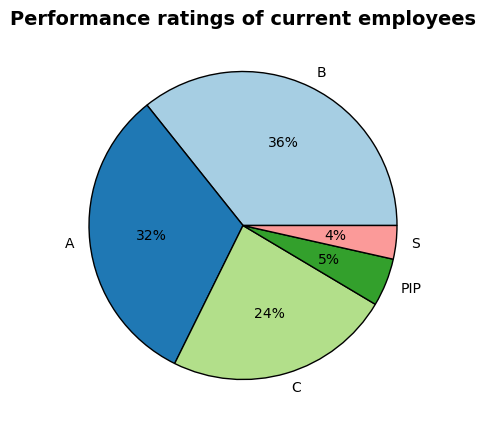

In [90]:
data=employees[employees['left']==0]
data=employees['Last_performance_rating'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.f%%',
        colors=plt.cm.Paired.colors,  
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}  )
plt.title('Performance ratings of current employees',fontsize=14,fontweight='bold')
plt.show()

### Average salary of employees based on rating

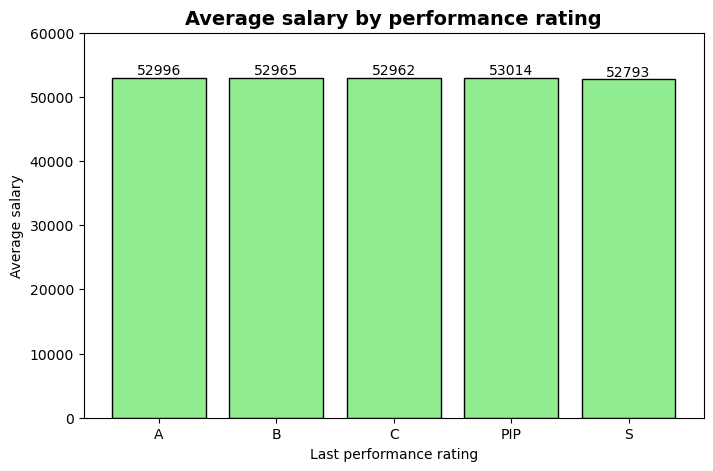

In [108]:
data = final_df.drop_duplicates(subset=['emp_no'])

data=data.groupby('Last_performance_rating')['salary'].mean()

plt.figure(figsize=(8,5))

bars=plt.bar(data.index,data.values,color='lightgreen', edgecolor='black')
plt.gca().bar_label(bars,fmt='%1.0f')
plt.xlabel('Last performance rating')
plt.ylabel('Average salary')
plt.title('Average salary by performance rating',fontsize=14,fontweight='bold')
plt.xticks(rotation=0)
plt.ylim(0,60000)
plt.show()

### Number of employees who have completed 10 projects

In [117]:
filtered_df=final_df[final_df['no_of_projects']==10]
unique_employees=filtered_df['emp_no'].nunique()
print(unique_employees)

30046


### Number of employees who completed n number of project

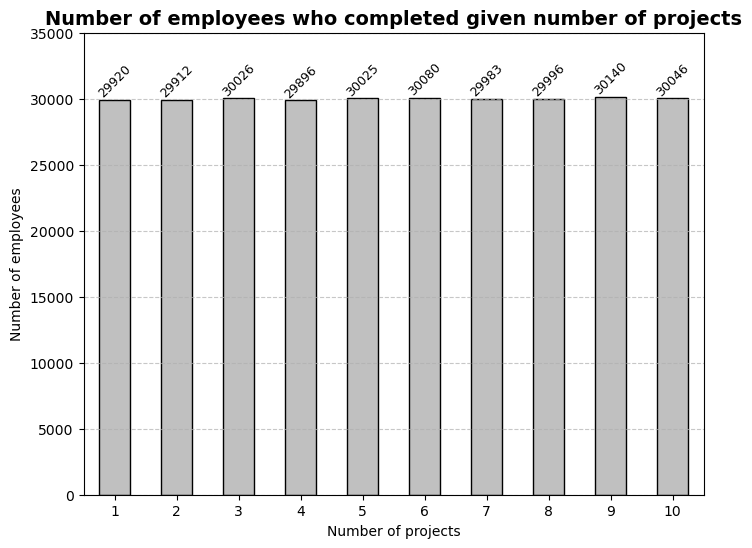

In [65]:
import matplotlib.pyplot as plt

# Compute number of employees per project count
s1 = final_df.drop_duplicates(subset=['emp_no']) \
    .groupby('no_of_projects')['emp_no'].count()

# Create bar plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = s1.plot(kind='bar', color='silver', edgecolor='black', ax=ax)

# Add value labels on top of bars, slanted
for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        height + 2,  # Y position (above the bar)
        f'{int(height)}',  # Display integer value
        ha='center', va='bottom', fontsize=9, color='black', 
        rotation=45  # Slanted text
    )

# Formatting
plt.title('Number of employees who completed given number of projects', fontsize=14, fontweight='bold')
plt.ylabel('Number of employees')
plt.xlabel('Number of projects')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0,35000)

# Show plot
plt.show()


### Average salary by job title

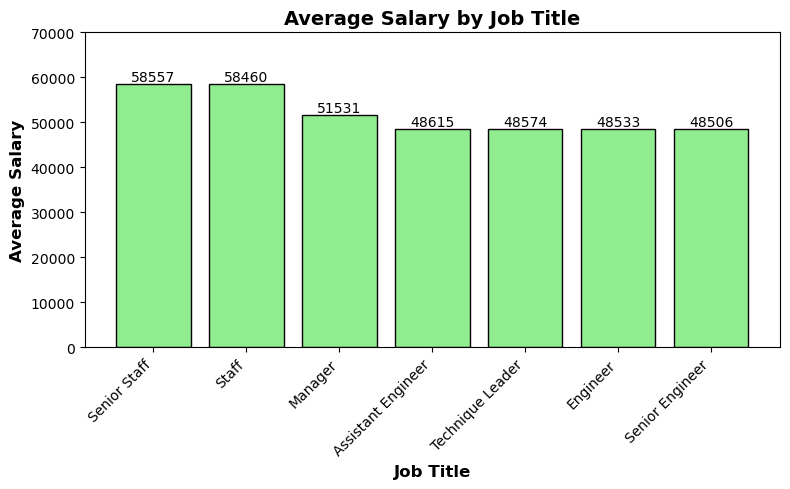

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# Calculate the mean salary by title
data = final_df.groupby('title')['salary'].mean().reset_index()

data=data.sort_values(by='salary',ascending=False)
# Create the bar chart
bars = plt.bar(data['title'], data['salary'], color='lightgreen', edgecolor='black')

# Get current axis and add labels on top of bars
plt.gca().bar_label(bars, fmt='%.0f')

# Customize labels and title
plt.ylabel('Average Salary', fontsize=12, fontweight='bold')
plt.xlabel('Job Title', fontsize=12, fontweight='bold')
plt.title('Average Salary by Job Title', fontsize=14, fontweight='bold')
plt.ylim(0,70000)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


### Number of employees by department

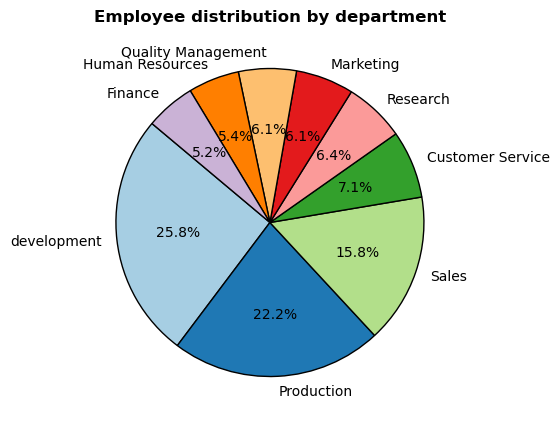

In [91]:
import matplotlib.pyplot as plt

# Compute department-wise employee count
data = final_df['dept_name'].value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.pie(
    data, 
    labels=data.index,  # Labels already contain name, count, and percentage
    startangle=140, 
    autopct='%1.1f%%',
    colors=plt.cm.Paired.colors,  # Use a colormap for better distinction
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # Add black edges for clarity
)

# Title
plt.title('Employee distribution by department', fontsize=12, fontweight='bold')

# Show plot
plt.show()


### Number of employees by job title

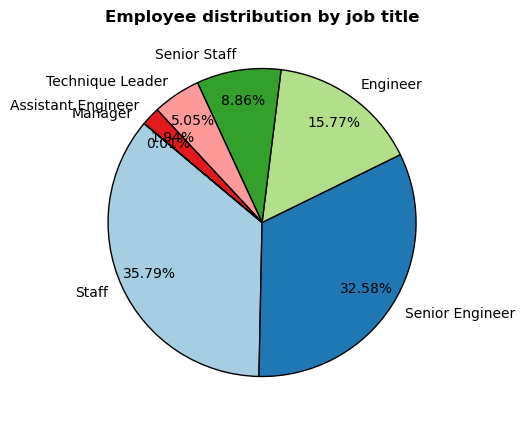

In [75]:
import matplotlib.pyplot as plt

data = final_df.drop_duplicates(subset=['emp_no'])

# Compute department-wise employee count
data = data['title'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 5))
plt.pie(
    data, 
    labels=data.index,  # Only department names
    startangle=140, 
    autopct='%1.2f%%',  # Show percentages with two decimal places
    colors=plt.cm.Paired.colors,  # Use colormap for distinct colors
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Add black edges for clarity
    pctdistance=0.8 # Adjust percentage distance (increase moves outward, decrease moves inward)
    
)

# Title
plt.title('Employee distribution by job title', fontsize=12, fontweight='bold')

# Show plot
plt.show()


### Average salary by department

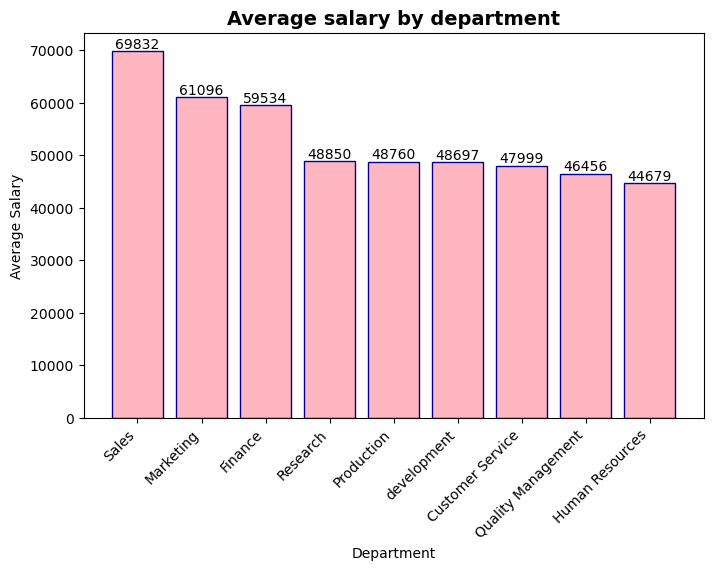

In [76]:
data=final_df.groupby('dept_name')['salary'].mean().reset_index()
data=data.sort_values(by='salary',ascending=False)

plt.figure(figsize=(8,5))
bars=plt.bar(data['dept_name'],data['salary'],color='lightpink',edgecolor='darkblue')
plt.xticks(rotation=45,ha='right')
plt.title('Average salary by department',fontweight='bold',fontsize=14)
plt.gca().bar_label(bars,fmt='%.0f')
plt.ylabel('Average Salary')
plt.xlabel('Department')
plt.show()


### Percentage of employees that left vs Percentage who are still present in the company

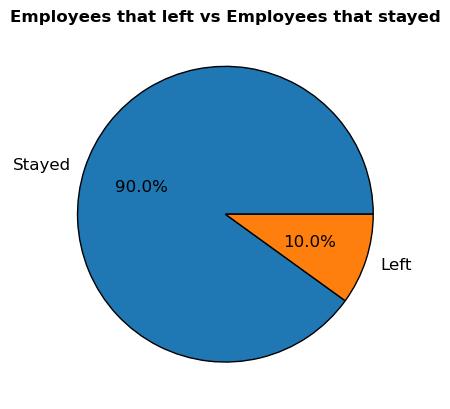

In [137]:
import matplotlib.pyplot as plt

# Count values and rename index for better readability
data = employees['left'].value_counts()
data.index = ['Stayed', 'Left']  # False -> Stayed, True -> Left

# Plot pie chart
plt.pie(data, labels=data.index,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        textprops={'fontsize': 12})
plt.title('Employees that left vs Employees that stayed', fontweight='bold')
plt.show()


### Average number of employees per manager

In [124]:
emp_no=final_df['emp_no'].nunique()
manager_no=final_df[final_df['title']=='Manager']['emp_no'].nunique()
ratio=emp_no/manager_no
print(ratio)

12501.0


### Average age by Job title

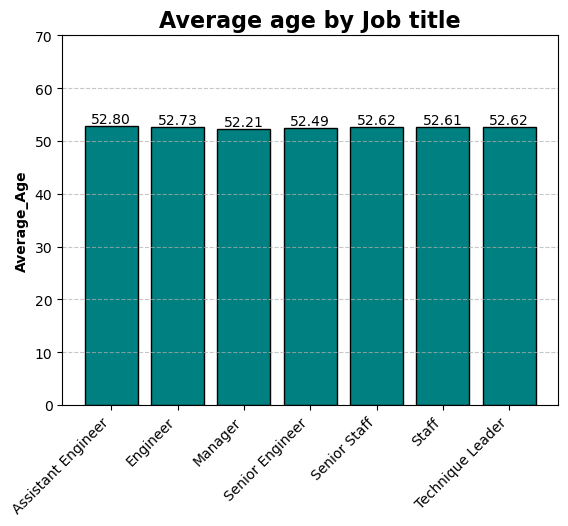

In [51]:
data = final_df.drop_duplicates(subset=['emp_no']) \
    .groupby('no_of_projects')['emp_no'].count()

data=final_df.groupby('title')['age'].mean()

bars=plt.bar(data.index,data.values,edgecolor='black',color='teal')
plt.gca().bar_label(bars,fmt='%.2f')
plt.xticks(rotation=45,ha='right')
plt.title('Average age by Job title',fontsize=16,fontweight='bold')
plt.ylabel('Average_Age',fontweight='bold')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.ylim(0,70)
plt.show()

### Average age by department

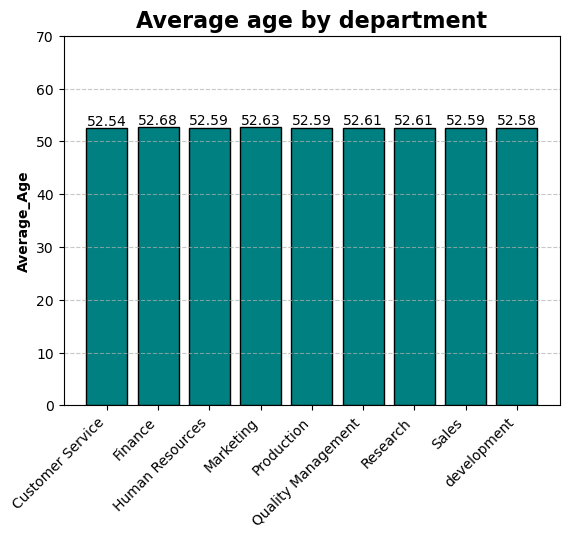

In [ ]:
data = final_df.drop_duplicates(subset=['emp_no']) \
    .groupby('no_of_projects')['emp_no'].count()

data=final_df.groupby('dept_name')['age'].mean()

bars=plt.bar(data.index,data.values,edgecolor='black',color='teal')
plt.gca().bar_label(bars,fmt='%.2f')
plt.xticks(rotation=45,ha='right')
plt.title('Average age by department',fontsize=16,fontweight='bold')
plt.ylabel('Average_Age',fontweight='bold')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.ylim(0,70)
plt.show()

### Male to Female ratio by each department

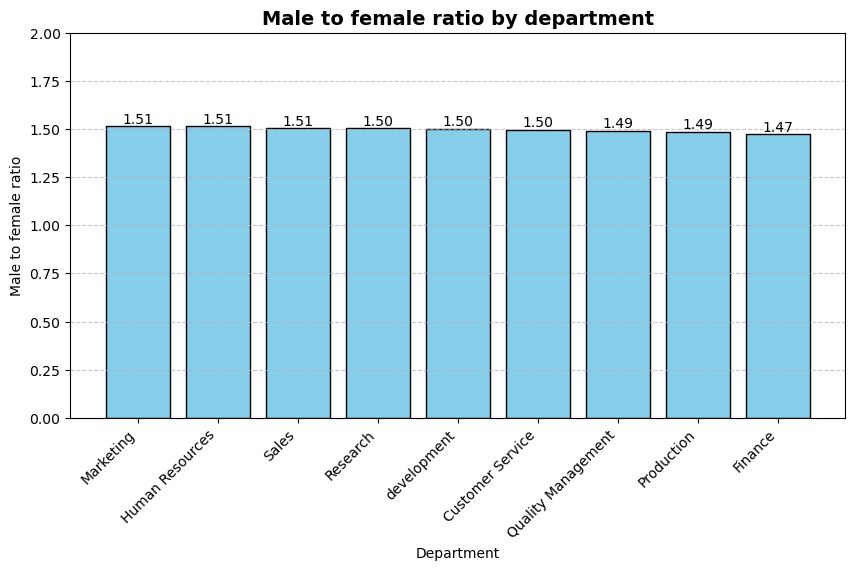

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Group by department and sex, count occurrences, and reshape
gender_counts = final_df.groupby(['dept_name', 'sex']).size().unstack()

# Calculate Male-to-Female ratio
gender_counts['M to F ratio'] = gender_counts['M'] / gender_counts['F']

gender_counts=gender_counts.sort_values(by='M to F ratio',ascending=False)

# Create bar plot
bars = plt.bar(gender_counts.index, gender_counts['M to F ratio'], color='skyblue', edgecolor='black')

# Add labels on top of bars
plt.gca().bar_label(bars, fmt='%.2f')  

# Improve visualization
plt.xlabel("Department")
plt.ylabel("Male to female ratio")
plt.title("Male to female ratio by department",fontsize=14,fontweight='bold')
plt.xticks(rotation=45,ha='right')  # Rotate department names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.ylim(0,2)
# Show plot
plt.show()


### Male to Female ratio by Job title

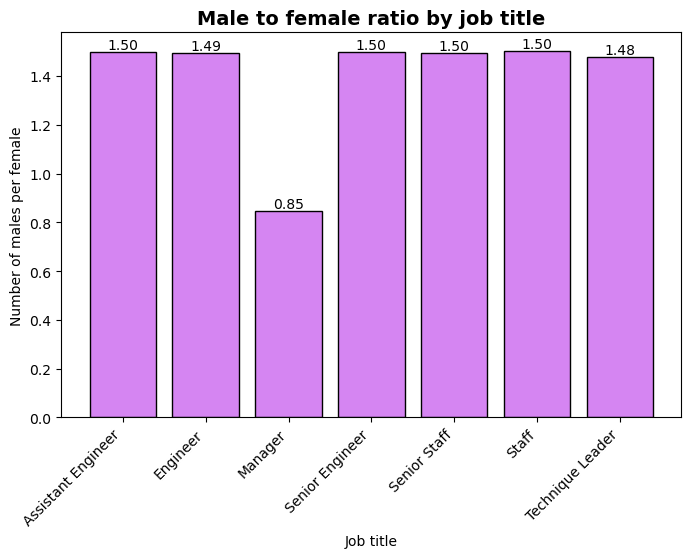

In [93]:
plt.figure(figsize=(8,5))

grouped_data=final_df.groupby(['title','sex']).size().unstack()
grouped_data['MtoF ratio']=grouped_data['M']/grouped_data['F']

bars=plt.bar(grouped_data.index,grouped_data['MtoF ratio'],color='#d585f2',edgecolor='black')
plt.gca().bar_label(bars,fmt='%.2f')
plt.title('Male to female ratio by job title',fontsize=14,fontweight='bold')
plt.xlabel('Job title')
plt.ylabel('Number of males per female')
plt.xticks(rotation=45,ha='right')
plt.show()

### Count of managers and employees in each department along with ratio

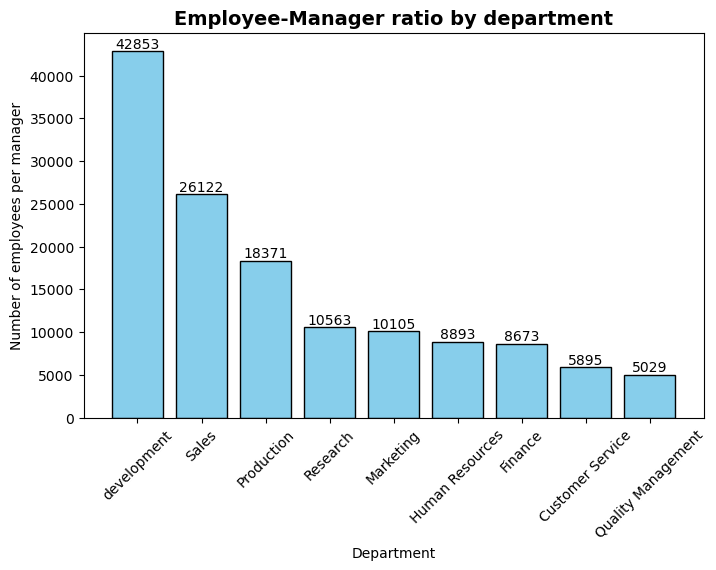

In [88]:
import matplotlib.pyplot as plt

# Filter managers
filtered_df = final_df[final_df['title'] == 'Manager']

# Group by 'dept_name' and count managers
result = filtered_df.groupby(['dept_name', 'title'])['emp_no'].count().unstack()

# Get total employees per department
emp = final_df.groupby('dept_name')['emp_no'].count()

# Add total employee count column
result['Total Employees'] = emp

# Calculate manager-to-employee ratio
result['employee-manager ratio'] = (result['Total Employees'] / result['Manager']).astype(int)

# Sort by manager-to-employee ratio in descending order
result = result.sort_values(by='employee-manager ratio', ascending=False)

# Plot the sorted manager-to-employee ratio
plt.figure(figsize=(8, 5))

# Plot horizontal bar chart using plt.barh()
bars = plt.bar(result.index, result['employee-manager ratio'], color='skyblue', edgecolor='black')

# Add labels to bars
plt.bar_label(bars, fmt='%.0f')

# Formatting
plt.title('Employee-Manager ratio by department', fontsize=14, fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Number of employees per manager')
plt.xticks(rotation=45)

# Show plot
plt.show()


In [63]:
# number of distinct rating
final_df['Last_performance_rating'].unique()

array(['A', 'B', 'PIP', 'C', 'S'], dtype=object)

## Average salary by gender

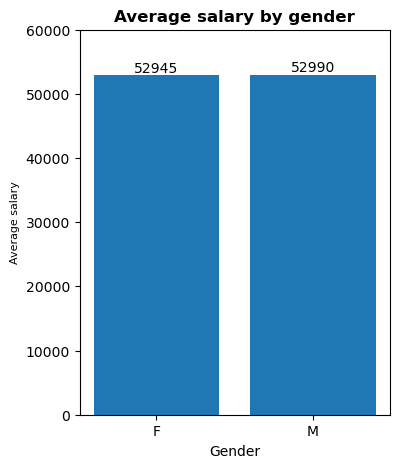

In [82]:
import matplotlib.pyplot as plt

# Group by 'sex' and calculate mean salary (returns a Series)
data = final_df.groupby('sex')['salary'].mean()

plt.figure(figsize=(4,5))
# Plot bar chart correctly
bars=plt.bar(data.index, data.values)  # Use index as X-axis, values as Y-axis
plt.bar_label(bars,fmt='%1.0f')
# Add title and labels
plt.title('Average salary by gender', fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Average salary',fontsize=8)
plt.ylim(0,60000)

# Show the plot
plt.show()


### Employee- Manager ratio

C:\Users\Joyal\AppData\Local\Temp\ipykernel_12700\425127777.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_dept'] = df['emp_no'].astype(str) + " - " + df['dept_name']


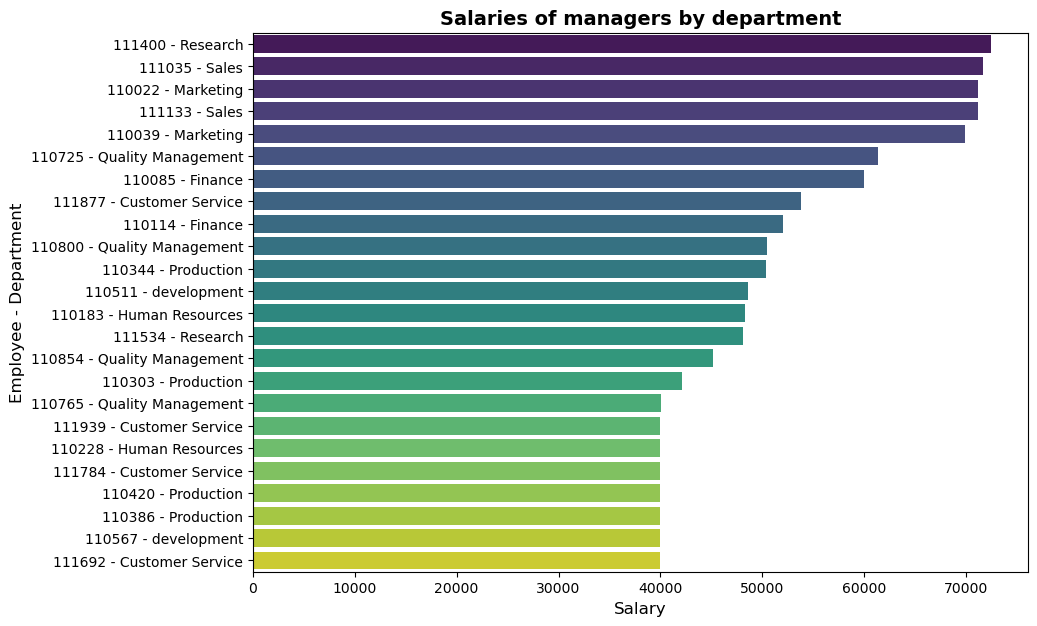

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Managers
filtered_df = final_df[final_df['title'] == "Manager"]

# Select relevant columns
df = filtered_df[['emp_no', 'dept_name', 'salary']]

# Concatenate emp_no and dept_name into a new column
df['emp_dept'] = df['emp_no'].astype(str) + " - " + df['dept_name']

# Sort by salary in descending order
df = df.sort_values(by='salary', ascending=False).reset_index(drop=True)

# Plot bar graph
plt.figure(figsize=(10, 7))
sns.barplot(x=df['salary'], y=df['emp_dept'], palette="viridis")

plt.xlabel("Salary", fontsize=12)
plt.ylabel("Employee - Department", fontsize=12)
plt.title("Salaries of managers by department", fontsize=14, fontweight='bold')

plt.show()


### Ratings of managers

In [66]:
import pandas as pd

# Define the custom order
rating_order = ["A", "B", "C","S", "PIP"]

# Convert the column to categorical with the specified order
filtered_df["Last_performance_rating"] = pd.Categorical(
    filtered_df["Last_performance_rating"], 
    categories=rating_order, 
    ordered=True
)

# Sort the DataFrame based on the ordered column
filtered_df = filtered_df.sort_values(by="Last_performance_rating")

# Display the required columns
filtered_df[['emp_no', 'first_name', 'last_name', 'Last_performance_rating']]


C:\Users\Joyal\AppData\Local\Temp\ipykernel_12700\3808646002.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Last_performance_rating"] = pd.Categorical(


,emp_no,first_name,last_name,Last_performance_rating
331602,110800,Sanjoy,Quadeer,A
17345,110085,Ebru,Alpin,A
35130,110183,Shirish,Ossenbruggen,A
331600,110725,Peternela,Onuegbe,A
311484,110511,DeForest,Hagimont,A
225775,110420,Oscar,Ghazalie,A
152293,111784,Marjo,Giarratana,A
331599,110765,Rutger,Hofmeyr,B
311485,110567,Leon,DasSarma,B
225778,110386,Shem,Kieras,B


C:\Users\Joyal\AppData\Local\Temp\ipykernel_5852\994645231.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Last_performance_rating"] = pd.Categorical(


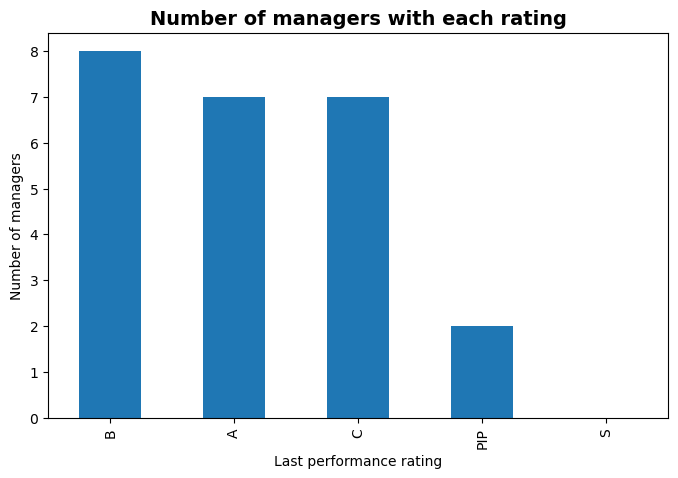

In [88]:
import pandas as pd

filtered_df=final_df[final_df['title']=='Manager']
# Define the custom order
rating_order = ["A", "B", "C","S", "PIP"]

# Convert the column to categorical with the specified order
filtered_df["Last_performance_rating"] = pd.Categorical(
    filtered_df["Last_performance_rating"], 
    categories=rating_order, 
    ordered=True
)

# Sort the DataFrame based on the ordered column
filtered_df = filtered_df.sort_values(by="Last_performance_rating")

# Display the required columns
filtered_df[['emp_no', 'first_name', 'last_name', 'Last_performance_rating']]

s1=filtered_df['Last_performance_rating'].value_counts()

plt.figure(figsize=(8,5))
s1.plot(kind='bar')
plt.title('Number of managers with each rating',fontweight='bold',fontsize=14)
plt.xlabel('Last performance rating')
plt.ylabel('Number of managers')
plt.show()


### Yearly hiring 

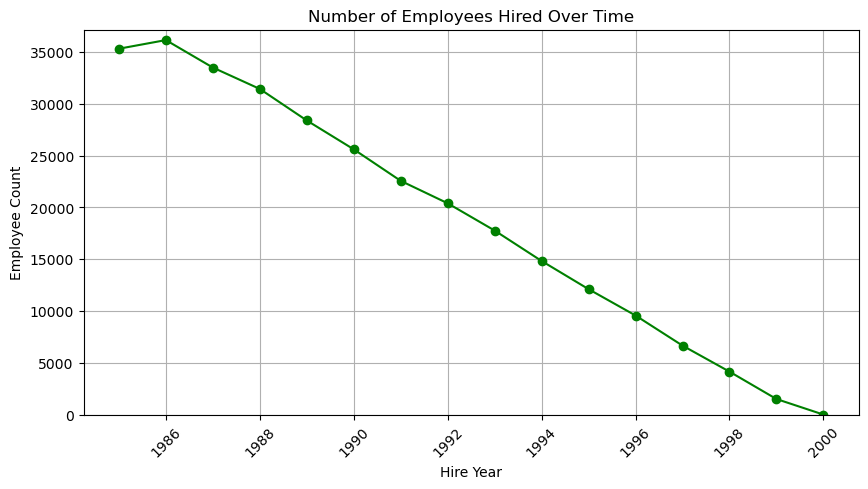

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure hire_date is in datetime format
employees['hire_date'] = pd.to_datetime(employees['hire_date'])

# Extract the year from hire_date
employees['hire_year'] = employees['hire_date'].dt.year

# Group by hire_year and count employees
grouped_data = employees.groupby('hire_year')['emp_no'].count()

# Create a full range of years
all_years = np.arange(employees['hire_year'].min(), employees['hire_year'].max() + 1)
grouped_data = grouped_data.reindex(all_years, fill_value=0)  # Ensure missing years show as 0

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', color='green')

# Fix y-axis so that 0 is perfectly aligned with x-axis
plt.ylim(0, grouped_data.values.max() + 1000)  # Adjust margin for better visualization

# Labels and formatting
plt.xlabel('Hire Year')
plt.ylabel('Employee Count')
plt.title('Number of Employees Hired Over Time')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


### Attrition rate over the years

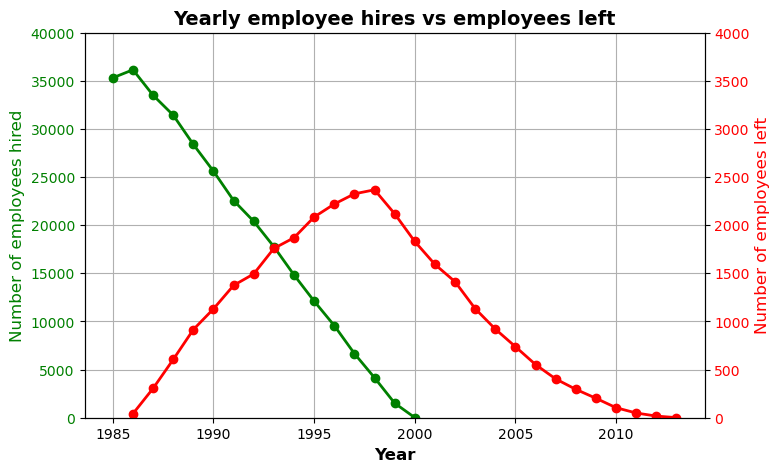

In [109]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'employees' DataFrame exists with 'hire_date', 'last_date', and 'emp_no' columns
hires = employees.groupby(employees['hire_date'].dt.year)['emp_no'].count()
leaves = employees.groupby(employees['last_date'].dt.year)['emp_no'].count()

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot hires (primary axis)
ax1.plot(hires.index, hires.values, '-o', color='green', label='Hired Employees', linewidth=2)
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of employees hired', color='green', fontsize=12)
ax1.tick_params(axis='y', labelcolor='green')

# Create secondary y-axis
ax2 = ax1.twinx()
ax2.plot(leaves.index, leaves.values, '-o', color='red', label='Employees Left', linewidth=2)
ax2.set_ylabel('Number of employees left', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Set the limits to enforce a 10:1 ratio
# Primary axis: 0 to 40000 (as requested)
# Secondary axis: 0 to 4000 (to maintain 10:1 ratio)
ax1.set_ylim(0, 40000)
ax2.set_ylim(0, 4000)

# Set the ticks to align 5000 (hires) with 500 (leaves), 10000 with 1000, etc.
ax1.set_yticks(np.arange(0, 40001, 5000))  # Ticks at 0, 5000, 10000, ..., 40000
ax2.set_yticks(np.arange(0, 4001, 500))    # Ticks at 0, 500, 1000, ..., 4000

# Add gridlines for visual reference
ax1.grid(True, linestyle='-', alpha=1)

# Title
plt.title('Yearly employee hires vs employees left', fontsize=14, fontweight='bold')

# Show plot
plt.show()

### Ratings of employees who left

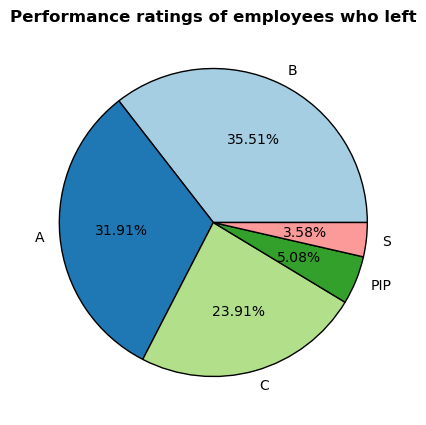

In [103]:
filtered_df=employees[employees['left']==1]
data=filtered_df['Last_performance_rating'].value_counts()
plt.figure(figsize=(8,5))


plt.pie(data.values,labels=data.index,autopct='%1.2f%%',  
    colors=plt.cm.Paired.colors,  
    wedgeprops={'edgecolor': 'black', 'linewidth': 1})

plt.title('Performance ratings of employees who left',fontweight='bold')
plt.show()


### Ratings of employees who stayed

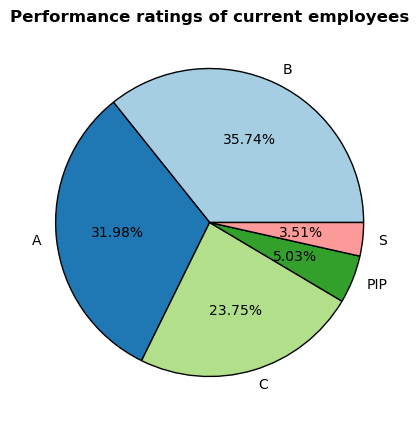

In [106]:
filtered_df=employees[employees['left']==0]
data=filtered_df['Last_performance_rating'].value_counts()
plt.figure(figsize=(8,5))


plt.pie(data.values,labels=data.index,autopct='%1.2f%%',  
    colors=plt.cm.Paired.colors,  
    wedgeprops={'edgecolor': 'black', 'linewidth': 1})

plt.title('Performance ratings of current employees',fontweight='bold')
plt.show()


### Average salary of manager by department

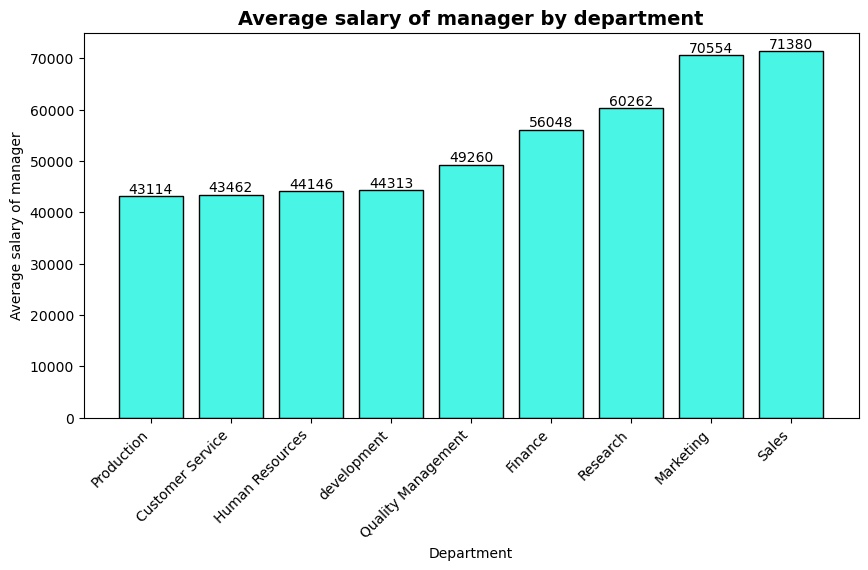

In [78]:
filtered_df=final_df[final_df['title']=='Manager']

data=filtered_df.groupby('dept_name')['salary'].mean()

data=data.sort_values()

plt.figure(figsize=(10,5))
bars=plt.bar(data.index,data.values,color='#49f5e4',edgecolor='black')

plt.gca().bar_label(bars,fmt='%.0f')

plt.ylabel('Average salary of manager')

plt.xlabel('Department')

plt.xticks(rotation=45,ha='right')
plt.title('Average salary of manager by department',fontweight='bold',fontsize=14)
plt.show()

### Average salary by Tenure

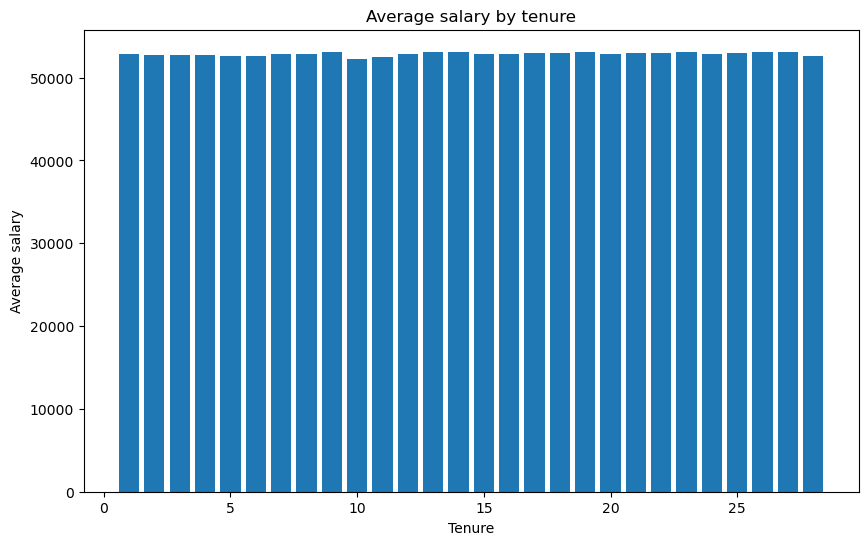

In [65]:
data=final_df.drop_duplicates(subset='emp_no')

data=data.groupby('tenure')['salary'].mean()

plt.figure(figsize=(10,6))
bars=plt.bar(data.index,data.values)

plt.title('Average salary by tenure')

plt.ylabel('Average salary')

plt.xlabel('Tenure')

plt.show()

### Distribution of tenure

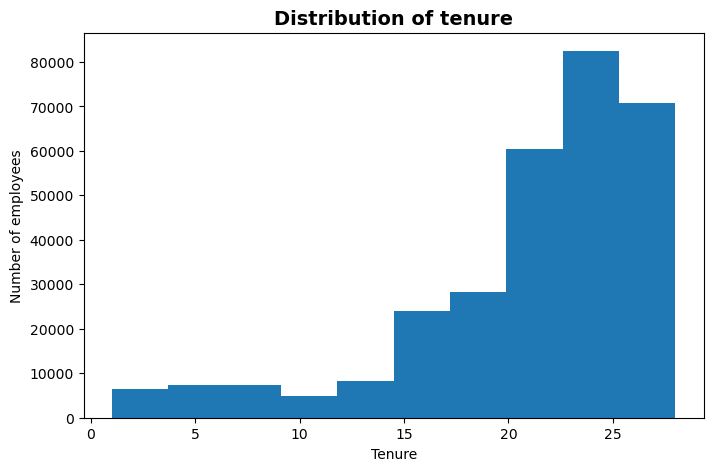

In [46]:
plt.figure(figsize=(8, 5))
plt.hist(employees['tenure'])
plt.title('Distribution of tenure',fontweight='bold',fontsize=14)
plt.ylabel('Number of employees')
plt.xlabel('Tenure')
plt.show()

In [48]:
s1=final_df.groupby('dept_name')['salary'].max()
s1.sort_values()

dept_name
Quality Management     95634
Production            104390
Research              105384
Human Resources       110308
development           110449
Finance               114784
Marketing             118250
Customer Service      122423
Sales                 129492
Name: salary, dtype: int64